## Задача 1. Война и мир
Мало кто не знает про знаменитый роман Л. Н. Толстого «Война и мир». Это довольно объёмное произведение лежит в архиве voina-i-mir.zip. Напишите программу, которая подсчитает статистику по буквам (не только русского алфавита) в этом романе и выведет результат на экран (или в файл).

Результат должен быть отсортирован по частоте встречаемости букв (по возрастанию или убыванию). 

Регистр символов имеет значение. 

<b>Требуется написать программу так, чтобы для её работы не требовалась распаковка архива «вручную».</b>


In [ ]:
import zipfile
from zipfile import ZipFile

In [ ]:
# Создаем словарь для подсчета статистики по буквам
alphabet = []
letters_count = {letter: 0 for letter in alphabet}

In [ ]:
# Открываем архив и получаем файл
zip_file = ZipFile('voyna-i-mir.zip')
my_file = zip_file.open('voyna-i-mir.txt')

In [ ]:
# Читаем файл построчно
for line in my_file:
    line = line.decode('utf-8')
    # Подсчитываем статистику по буквам
    for letter in line:
        if letter in alphabet:
            letters_count[letter] += 1
        else:
            alphabet.append(letter)
            letters_count.update({letter: 1})

# Сортируем словарь по частоте встречаемости букв
sorted_letters_count = sorted(letters_count.items(), key=lambda x: x[1], reverse=True)

# Выводим результаты на экран
for letter, count in sorted_letters_count:
    print(f"{letter}: {count}")

# Выводим результаты в файл
with open('results.txt', 'w', encoding='utf-8') as f:
    for letter, count in sorted_letters_count:
        f.write(f"{letter}: {count}\n")

## Задача 2. Теплопроводность


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
import csv
import os

In [2]:
if not os.path.isdir('maps'):
    os.mkdir('maps')

if not os.path.isdir('data'):
    os.mkdir('data')

In [3]:
def out_data(U, X, Y, current_time):
    data = pd.DataFrame(data = U,
                      index = X,
                      columns = Y)
    data.to_csv(f'data/data_{current_time:.6f}.csv', sep = ';')

In [4]:
# Параметры расчета
N_X = 100
N_Y = 100
T_ = 0.01
L_X = 1
L_Y = 1
H_X = L_X / (N_X - 1)
H_Y = L_Y / (N_Y - 1)
A = 1
TAU = 1 / (2 * pow(A, 2) * (pow(H_X, -2) + pow(H_Y, -2)))
# TAU = H_X / (4 * pow(A, 2))
X = np.arange(0, L_X + H_X, H_X)
Y = np.arange(0, L_Y + H_Y, H_Y)
T = np.arange(0, T_ + TAU, TAU)
U = np.zeros((len(X), len(Y)))
# Желаемое число кадров в gif
FRAMES = 15
DIVIDER = int(len(T) / FRAMES)

In [5]:
def u_0(x, y):
    pass
    return 1

In [6]:
def psi_1(y, t):
    pass
    return 0

In [7]:
def psi_2(y, t):
    pass
    return 0

In [8]:
def psi_3(x, t):
    pass
    return 0

In [9]:
def psi_4(x, t):
    pass
    return 0

In [10]:
# Заполняем начальные условия
for i, x in enumerate(X):
    for j, y in enumerate(Y):
        U[i][j] = u_0(x, y)

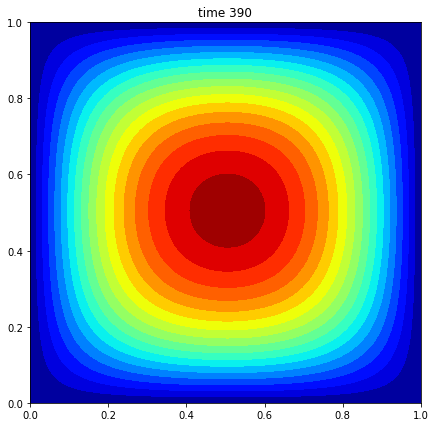

In [12]:
# Открываем CSV-файл для записи
plt.figure(figsize=(7,7))
# with open('U.csv', mode='w') as file:
#     writer = csv.writer(file, delimiter=',')

for n, t in enumerate(T):
    # Сохраняем значения на предыдущем шаге
    U_previous = U
    #  Заполняем граничные условия
    for i, y in enumerate(Y):
        U[0][i] = psi_1(y, t)
        U[len(X) - 1][i] = psi_2(y, t)
    for i, x in enumerate(X):
        U[i][0] = psi_3(x, t)
        U[i][len(Y) - 1] = psi_4(x, t)

    #  Делаем шаг схемой
    if 0 < n < len(T) - 1:
        for i in range(1, len(X) - 1):
            for j in range(1, len(Y) - 1):
                U[i][j] = U_previous[i][j] + TAU * pow(A, 2) * (
                        (U_previous[i + 1][j] - 2 * U_previous[i][j] + U_previous[i - 1][j]) / pow(H_Y, 2) + (
                        U_previous[i][j + 1] - 2 * U_previous[i][j] + U_previous[i][j - 1]) / pow(H_Y, 2))

    out_data(U, X, Y, t)
    # writer.writerows(U)
    if n % DIVIDER == 0:
        im = plt.contourf(X, Y, U, 20, cmap=plt.cm.jet)
        plt.title(f'time {n}')
        # Сохраняем карту в файл
        plt.savefig(f'maps/time-{n}_tau-{TAU:.6f}.png')
    # Файл закрыт автоматически

In [ ]:
# Получаем список файлов в папке
file_list = os.listdir('maps/')
image_files = [file for file in file_list]
image_files.sort(key=lambda x: int(x.split('time-')[1].split('_tau')[0]))

tau_values = []
images = []
for filename in image_files:
    tau = filename.split('tau-')[1].split('.png')[0]
    tau_values.append(float(tau))

    im = Image.open(f'maps/{filename}')
    images.append(im)

# Сохраняем gif-изображение
images[0].save('maps.gif', save_all=True, append_images=images[1:], duration=500, loop=0)

# Выводим список вторых чисел
print(tau_values)

Написать функцию, возвращающую массив длительностей каждого кадра последовательности изображений
Шаг считать переменным.

In [ ]:
def time_duration(tau_values, T):
    # Переведем секунды в миллисекунды, поскольку duration измеряется в миллисекундах
    T = T * 1000
    # Найдем сколько условного времени займут сами шаги
    tau_sum = sum(tau_values)
    # Доля времени, для показа кадра единичной длительности
    coefficient = T / tau_sum
    # Посчитаем время отображения каждого кадра умножим долю на его условную длительности
    times = np.array([])
    for time in tau_values:
        times = np.append(times, time * coefficient)
    return times

In [ ]:
print(time_duration(tau_values, 10))

Сделать из части кода, создающей gif изображение, исполняемый файл

In [ ]:
!pyinstaller --onefile gif_maker.py --upx-dir "C:\Users\dsash\Desktop\upx-4.0.2-win64\upx-4.0.2-win64"

In [ ]:
!pyinstaller --onefile gif_maker.py